# **Capstone Project**
#Keshav Murthy
#DS16 - Batch

   
# Introduction

This project contains the dataset belongs to Bank Marketing. Bank contains deposits which means a financial term that means money held at a bank. In a bank the types of deposits like, fixed deposit, term deposits, savings account, recurring deposits, current account etc.

In General the bank activities like, providing debit card, credit card, pass book, several deposites, loans, cheques etc.


The Bank aims for more targeted marketing campaigns. To accomplish their goals Bank want to identify customers who can buy their products such as credit cards, fixed deposits and term deposits and may take loans.

The bank wants to build a profile of customers who are more likely to buy the products.

###The bank provides some Variables such as:

age : (numeric)

job : type of job admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

marital : marital status ("divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

education ("basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

default: Does the customer have credit in default? ( "no","yes","unknown")

Balance: balance of the customer

housing: Does the customer have a housing loan? ("no","yes","unknown")

loan: Does the customer have a personal loan? "no","yes","unknown")

Related with the last contact of the current campaign:
Contact: contact communication type ("cellular","telephone") 

Month: last contact month of year ("jan", "feb", "mar", ..., "nov", "dec")

day_of_week: last contact day of the week ("mon","tue","wed","thu","fri")

Duration: last contact duration, in seconds. Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call ‘y’ is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Campaign: Number of contacts performed during this campaign and for this client includes last contact

pdays: Number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)

Previous: number of contacts performed before this campaign and for this client

poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

Outcome variable:
y - has the client subscribed to a term deposit? ("yes","no")

#Approach

### We have to take the fallowing steps to do the Analysis:

Import data from dataset and perform analysis, look at the number of rows, look at the missing values, look at the dataset columns and their values respective to the campaign outcome.
Cleaning the data by removing irrelevant columns, deal with missing and incorrect values, and visualizing the data.

#Data Cleaning

In [ ]:
#Importing necessarry libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# import and read the first file
rcb = pd.read_csv('bank.csv')
#given a data frame name
rcb.head()

age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
0  30;"unemployed";"married";"primary";"no";1787;...                                                                                                  
1  33;"services";"married";"secondary";"no";4789;...                                                                                                  
2  35;"management";"single";"tertiary";"no";1350;...                                                                                                  
3  30;"management";"married";"tertiary";"no";1476...                                                                                                  
4  59;"blue-collar";"married";"secondary";"no";0;...

##### Here the data seems to be concatinated in a single column, so we have to split the data into different columns.

In [ ]:
# splitting the data into different columns.

rcb[['Age','Job','Marital','Education','Default','Balance','Housing','Loan','Contact','Day','Month','Duration','Compaign','Pdays','Previous','Poutcome','Y']] = rcb['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'].str.split(";",expand=True)
rcb.head()

age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"  \
0  30;"unemployed";"married";"primary";"no";1787;...                                                                                                     
1  33;"services";"married";"secondary";"no";4789;...                                                                                                     
2  35;"management";"single";"tertiary";"no";1350;...                                                                                                     
3  30;"management";"married";"tertiary";"no";1476...                                                                                                     
4  59;"blue-collar";"married";"secondary";"no";0;...                                                                                                     

  Age            Job    Marital    Education Default Balance Housing   Loan  \
0  30   "unemployed"  "married"    "primary"    "no"    1787    "no"   "no"   
1  33     "services"  "married"  "secondary"    "no"    4789   "yes"  "yes"   
2  35   "management"   "single"   "tertiary"    "no"    1350   "yes"   "no"   
3  30   "management"  "married"   "tertiary"    "no"    1476   "yes"  "yes"   
4  59  "blue-collar"  "married"  "secondary"    "no"       0   "yes"   "no"   

      Contact Day  Month Duration Compaign Pdays Previous   Poutcome     Y  
0  "cellular"  19  "oct"       79        1    -1        0  "unknown"  "no"  
1  "cellular"  11  "may"      220        1   339        4  "failure"  "no"  
2  "cellular"  16  "apr"      185        1   330        1  "failure"  "no"  
3   "unknown"   3  "jun"      199        4    -1        0  "unknown"  "no"  
4   "unknown"   5  "may"      226        1    -1        0  "unknown"  "no"

In [ ]:
#the first column contains all column names so we use iloc function to drop the first column
rcb = rcb.iloc[:,1:] #iloc will take index position 
rcb.head(10) #to check first 10 rows 

Age              Job    Marital    Education Default Balance Housing   Loan  \
0  30     "unemployed"  "married"    "primary"    "no"    1787    "no"   "no"   
1  33       "services"  "married"  "secondary"    "no"    4789   "yes"  "yes"   
2  35     "management"   "single"   "tertiary"    "no"    1350   "yes"   "no"   
3  30     "management"  "married"   "tertiary"    "no"    1476   "yes"  "yes"   
4  59    "blue-collar"  "married"  "secondary"    "no"       0   "yes"   "no"   
5  35     "management"   "single"   "tertiary"    "no"     747    "no"   "no"   
6  36  "self-employed"  "married"   "tertiary"    "no"     307   "yes"   "no"   
7  39     "technician"  "married"  "secondary"    "no"     147   "yes"   "no"   
8  41   "entrepreneur"  "married"   "tertiary"    "no"     221   "yes"   "no"   
9  43       "services"  "married"    "primary"    "no"     -88   "yes"  "yes"   

      Contact Day  Month Duration Compaign Pdays Previous   Poutcome     Y  
0  "cellular"  19  "oct"       79        1    -1        0  "unknown"  "no"  
1  "cellular"  11  "may"      220        1   339        4  "failure"  "no"  
2  "cellular"  16  "apr"      185        1   330        1  "failure"  "no"  
3   "unknown"   3  "jun"      199        4    -1        0  "unknown"  "no"  
4   "unknown"   5  "may"      226        1    -1        0  "unknown"  "no"  
5  "cellular"  23  "feb"      141        2   176        3  "failure"  "no"  
6  "cellular"  14  "may"      341        1   330        2    "other"  "no"  
7  "cellular"   6  "may"      151        2    -1        0  "unknown"  "no"  
8   "unknown"  14  "may"       57        2    -1        0  "unknown"  "no"  
9  "cellular"  17  "apr"      313        1   147        2  "failure"  "no"

In [ ]:
#this dataset contains special characters, so we have to remove those characters.

spec_character = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]

for i in spec_character:
    for column in rcb.columns:
        rcb[column] = rcb[column].str.replace(i, ' ')
rcb.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # Remove the CWD from sys.path while we load stuff.


Age            Job    Marital    Education Default Balance Housing   Loan  \
0  30    unemployed    married      primary      no     1787     no     no    
1  33      services    married    secondary      no     4789    yes    yes    
2  35    management     single     tertiary      no     1350    yes     no    
3  30    management    married     tertiary      no     1476    yes    yes    
4  59   blue collar    married    secondary      no        0    yes     no    

      Contact Day  Month Duration Compaign Pdays Previous   Poutcome     Y  
0   cellular   19   oct        79        1     1        0   unknown    no   
1   cellular   11   may       220        1   339        4   failure    no   
2   cellular   16   apr       185        1   330        1   failure    no   
3    unknown    3   jun       199        4     1        0   unknown    no   
4    unknown    5   may       226        1     1        0   unknown    no

In [ ]:
#to check the total rows and columns
rcb.shape

(4521, 17)

# Cleaning the second dataset

In [ ]:
# import and read the second file
srh = pd.read_csv('bank-full.csv')
srh.head() #to check first 5 rows 

age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
0  58;"management";"married";"tertiary";"no";2143...                                                                                                  
1  44;"technician";"single";"secondary";"no";29;"...                                                                                                  
2  33;"entrepreneur";"married";"secondary";"no";2...                                                                                                  
3  47;"blue-collar";"married";"unknown";"no";1506...                                                                                                  
4  33;"unknown";"single";"unknown";"no";1;"no";"n...

In [ ]:
#this data also concatinated in  single column, so we have to split the data.
srh[['Age','Job','Marital','Education','Default','Balance','Housing','Loan','Contact','Day','Month','Duration','Compaign','Pdays','Previous','Poutcome','Y']] = srh['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'].str.split(";",expand=True)
srh.head()

age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"  \
0  58;"management";"married";"tertiary";"no";2143...                                                                                                     
1  44;"technician";"single";"secondary";"no";29;"...                                                                                                     
2  33;"entrepreneur";"married";"secondary";"no";2...                                                                                                     
3  47;"blue-collar";"married";"unknown";"no";1506...                                                                                                     
4  33;"unknown";"single";"unknown";"no";1;"no";"n...                                                                                                     

  Age             Job    Marital    Education Default Balance Housing   Loan  \
0  58    "management"  "married"   "tertiary"    "no"    2143   "yes"   "no"   
1  44    "technician"   "single"  "secondary"    "no"      29   "yes"   "no"   
2  33  "entrepreneur"  "married"  "secondary"    "no"       2   "yes"  "yes"   
3  47   "blue-collar"  "married"    "unknown"    "no"    1506   "yes"   "no"   
4  33       "unknown"   "single"    "unknown"    "no"       1    "no"   "no"   

     Contact Day  Month Duration Compaign Pdays Previous   Poutcome     Y  
0  "unknown"   5  "may"      261        1    -1        0  "unknown"  "no"  
1  "unknown"   5  "may"      151        1    -1        0  "unknown"  "no"  
2  "unknown"   5  "may"       76        1    -1        0  "unknown"  "no"  
3  "unknown"   5  "may"       92        1    -1        0  "unknown"  "no"  
4  "unknown"   5  "may"      198        1    -1        0  "unknown"  "no"

In [ ]:
#dropping the first column
srh = srh.iloc[:,1:]  #iloc takes index position
srh.head()

Age             Job    Marital    Education Default Balance Housing   Loan  \
0  58    "management"  "married"   "tertiary"    "no"    2143   "yes"   "no"   
1  44    "technician"   "single"  "secondary"    "no"      29   "yes"   "no"   
2  33  "entrepreneur"  "married"  "secondary"    "no"       2   "yes"  "yes"   
3  47   "blue-collar"  "married"    "unknown"    "no"    1506   "yes"   "no"   
4  33       "unknown"   "single"    "unknown"    "no"       1    "no"   "no"   

     Contact Day  Month Duration Compaign Pdays Previous   Poutcome     Y  
0  "unknown"   5  "may"      261        1    -1        0  "unknown"  "no"  
1  "unknown"   5  "may"      151        1    -1        0  "unknown"  "no"  
2  "unknown"   5  "may"       76        1    -1        0  "unknown"  "no"  
3  "unknown"   5  "may"       92        1    -1        0  "unknown"  "no"  
4  "unknown"   5  "may"      198        1    -1        0  "unknown"  "no"

In [ ]:
#removing special characters
#sepecial characters are already defined
for char in spec_character:
    for column in srh.columns:
        srh[column] = srh[column].str.replace(char, ' ')
srh.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


Age             Job     Marital    Education Default Balance Housing   Loan  \
0  58     management     married     tertiary      no     2143    yes     no    
1  44     technician      single    secondary      no       29    yes     no    
2  33   entrepreneur     married    secondary      no        2    yes    yes    
3  47    blue collar     married      unknown      no     1506    yes     no    
4  33        unknown      single      unknown      no        1     no     no    
5  35     management     married     tertiary      no      231    yes     no    
6  28     management      single     tertiary      no      447    yes    yes    
7  42   entrepreneur    divorced     tertiary     yes        2    yes     no    
8  58        retired     married      primary      no      121    yes     no    
9  43     technician      single    secondary      no      593    yes     no    

     Contact Day  Month Duration Compaign Pdays Previous   Poutcome     Y  
0   unknown    5   may       261        1     1        0   unknown    no   
1   unknown    5   may       151        1     1        0   unknown    no   
2   unknown    5   may        76        1     1        0   unknown    no   
3   unknown    5   may        92        1     1        0   unknown    no   
4   unknown    5   may       198        1     1        0   unknown    no   
5   unknown    5   may       139        1     1        0   unknown    no   
6   unknown    5   may       217        1     1        0   unknown    no   
7   unknown    5   may       380        1     1        0   unknown    no   
8   unknown    5   may        50        1     1        0   unknown    no   
9   unknown    5   may        55        1     1        0   unknown    no

In [ ]:
#to check the total rows and columns
srh.shape

(45211, 17)

# Merging two dataframes

In [ ]:
#concatinating the two dataframes into single and assigned as df

df = pd.concat([srh, rcb], axis='rows', ignore_index=True)
df.shape

(49732, 17)

In [ ]:
#final dataframe contains number of rows and columns along with data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        49732 non-null  object
 1   Job        49732 non-null  object
 2   Marital    49732 non-null  object
 3   Education  49732 non-null  object
 4   Default    49732 non-null  object
 5   Balance    49732 non-null  object
 6   Housing    49732 non-null  object
 7   Loan       49732 non-null  object
 8   Contact    49732 non-null  object
 9   Day        49732 non-null  object
 10  Month      49732 non-null  object
 11  Duration   49732 non-null  object
 12  Compaign   49732 non-null  object
 13  Pdays      49732 non-null  object
 14  Previous   49732 non-null  object
 15  Poutcome   49732 non-null  object
 16  Y          49732 non-null  object
dtypes: object(17)
memory usage: 6.5+ MB


#### By concatenating the two data frames we have 49732 rows and 17 columns and data types as object.

In [ ]:
#here it shows all the data types as strings, so we have to convert them into required datatypes.
for i in ['Age', 'Balance', 'Day','Duration', 'Compaign', 'Pdays', 'Previous']:
  df[i]= df[i].astype('int64')
df.dtypes

Age           int64
Job          object
Marital      object
Education    object
Default      object
Balance       int64
Housing      object
Loan         object
Contact      object
Day           int64
Month        object
Duration      int64
Compaign      int64
Pdays         int64
Previous      int64
Poutcome     object
Y            object
dtype: object

In [ ]:
#checking the missing values in  the dataset
df.isnull().sum()

Age          0
Job          0
Marital      0
Education    0
Default      0
Balance      0
Housing      0
Loan         0
Contact      0
Day          0
Month        0
Duration     0
Compaign     0
Pdays        0
Previous     0
Poutcome     0
Y            0
dtype: int64

Their are no missing values in the data set


In [ ]:
#To check duplicated values 
print(df.duplicated().value_counts())

False    45211
True      4521
dtype: int64


We have 4521 duplicates so we have to remove duplicates.

In [ ]:
# to remove duplicates we use drop function
#subset default value is none, keep is to control the duplicate value, inplace removes the duplicates with rows if it is true, i dont want to delete index so ignored.
df= df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
df

Age             Job     Marital    Education Default  Balance Housing  \
0       58     management     married     tertiary      no      2143    yes    
1       44     technician      single    secondary      no        29    yes    
2       33   entrepreneur     married    secondary      no         2    yes    
3       47    blue collar     married      unknown      no      1506    yes    
4       33        unknown      single      unknown      no         1     no    
...    ...             ...         ...          ...     ...      ...     ...   
45206   51     technician     married     tertiary      no       825     no    
45207   71        retired    divorced      primary      no      1729     no    
45208   72        retired     married    secondary      no      5715     no    
45209   57    blue collar     married    secondary      no       668     no    
45210   37   entrepreneur     married    secondary      no      2971     no    

        Loan      Contact  Day  Month  Duration  Compaign  Pdays  Previous  \
0        no      unknown     5   may        261         1      1         0   
1        no      unknown     5   may        151         1      1         0   
2       yes      unknown     5   may         76         1      1         0   
3        no      unknown     5   may         92         1      1         0   
4        no      unknown     5   may        198         1      1         0   
...      ...          ...  ...    ...       ...       ...    ...       ...   
45206    no     cellular    17   nov        977         3      1         0   
45207    no     cellular    17   nov        456         2      1         0   
45208    no     cellular    17   nov       1127         5    184         3   
45209    no    telephone    17   nov        508         4      1         0   
45210    no     cellular    17   nov        361         2    188        11   

        Poutcome      Y  
0       unknown     no   
1       unknown     no   
2       unknown     no   
3       unknown     no   
4       unknown     no   
...          ...    ...  
45206   unknown    yes   
45207   unknown    yes   
45208   success    yes   
45209   unknown     no   
45210     other     no   

[45211 rows x 17 columns]

## After removing the duplicates the final dataset contains 45211 rows and 17 columns.

In [ ]:
#saving the final dataset
df.to_csv('data_cleaned.csv', index=False, header=True)

#Data Analysis

In [ ]:
#y is an outcome variable.
df.groupby("Y").size()

Y
 no      39922
 yes      5289
dtype: int64

Text(0.5, 1.0, 'subscribed Frequency')

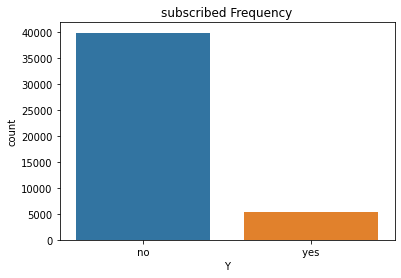

In [ ]:
#using count plot to know the subscribed frequency
sns.countplot(data=df, x='Y')
plt.title("subscribed Frequency")
plt.show()

##### From the above plot shows that only 12.5% of the clients are subscribed to a term deposit from the given data set.

## Analysing dependency on age attribute

In [ ]:
#analysing the dependency of only age column by using describe function
df_age=df[["Age","Y"]]
df_age.describe()

Age
count  45211.000000
mean      40.936210
std       10.618762
min       18.000000
25%       33.000000
50%       39.000000
75%       48.000000
max       95.000000

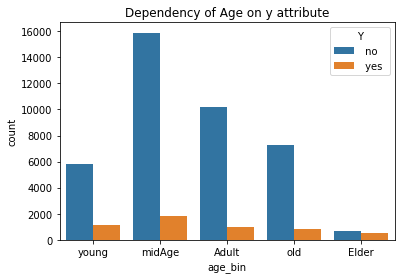

In [ ]:
df["age_bin"]=pd.cut(df.Age,bins=[20,30,40,50,60,100],labels=['young','midAge','Adult',"old",'Elder'])
sns.countplot(x="age_bin",data=df,hue="Y")
plt.title("Dependency of Age on y attribute")
plt.show()

####From the above analysis shows that mid age people are more likely to have term deposite

## Analysing dependency on Default attritube

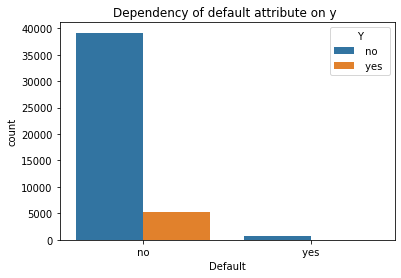

In [ ]:
sns.countplot(x="Default",hue="Y",data=df)
plt.title("Dependency of default attribute on y ")
plt.show()

##### Client subscribed to a term deposit do not have any credit card i.e clients are financially intelligent.

## Analysing dependency on  Housing attribute

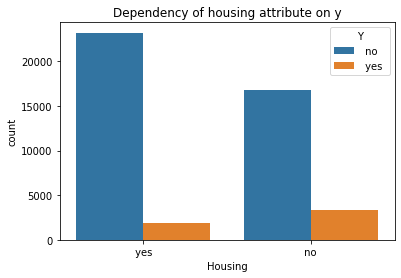

In [ ]:
sns.countplot(x="Housing",hue="Y",data=df)
plt.title("Dependency of housing attribute on y")
plt.show()

##### It is an expected result that those with home loans do not have deposits
##### Because these people have chosen to secure their future as homeowners instead of deposits.
##### Probably it is most correlated variable

## Analysing dependency on  Loan attribute

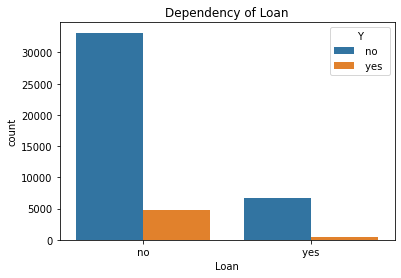

In [ ]:
sns.countplot(x="Loan",hue="Y",data=df)
plt.title("Dependency of Loan")
plt.show()

##### Loan category not as much correlated with deposit as housing.

## Analysing dependency on  Balance attribute

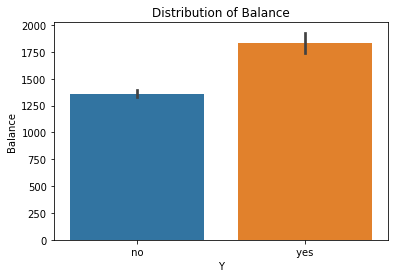

In [63]:
sns.barplot(x="Y",y="Balance",data=df)
plt.title("Distribution of Balance")
plt.show()

##### we need to understand distribution of balance and categorize it.

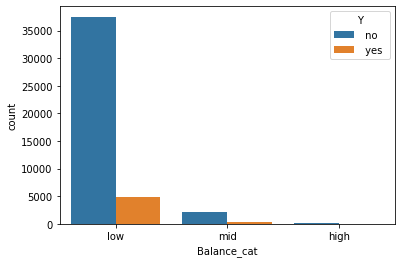

In [ ]:
df["Balance_cat"] = np.nan
df.loc[df['Balance'] <0, 'Balance_cat'] = 'negative'
df.loc[(df['Balance'] >=0)&(df['Balance'] <=5000), 'Balance_cat'] = 'low'
df.loc[(df['Balance'] >5000)&(df['Balance'] <=20000), 'Balance_cat'] = 'mid'
df.loc[(df['Balance'] >20000), 'Balance_cat'] = 'high'
sns.countplot(x="Balance_cat",hue="Y",data=df)
plt.show()

## Analysing dependency on  Contact attribute

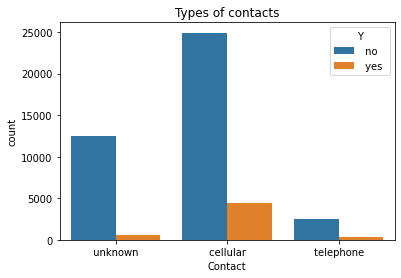

In [ ]:
sns.countplot(x="Contact",hue="Y",data=df)
plt.title("Types of contacts")
plt.show()

## Analysing dependency on  Month attribute

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="Month",hue="Y",data=df)
plt.title("Dependency of Month Column")
plt.show()

##### Looks like monthly effect on may,jun,feb,jan,aug,nov 

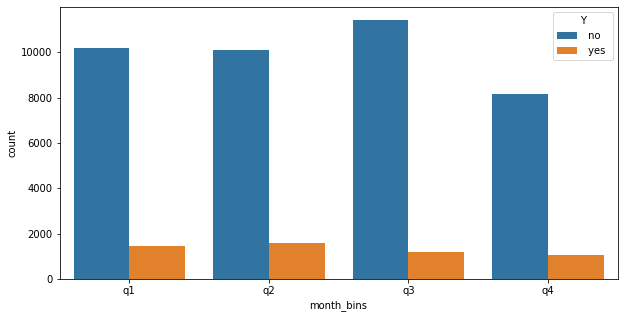

In [ ]:
df["month_bins"]=pd.cut(df.Day,bins=4,labels=["q1","q2","q3","q4"])
plt.figure(figsize=(10,5))
sns.countplot(x="month_bins",hue="Y",data=df)
plt.show()

## Analysing dependency on Day attribute

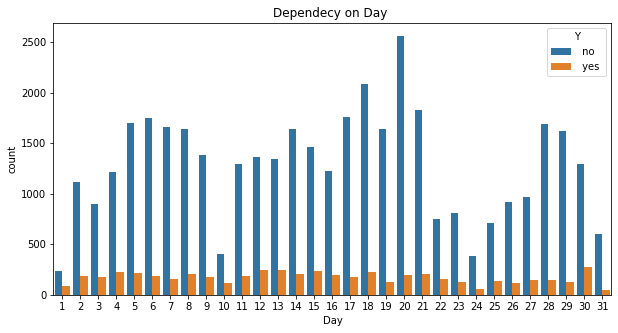

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="Day",hue="Y",data=df)
plt.title("Dependecy on Day ")
plt.show()

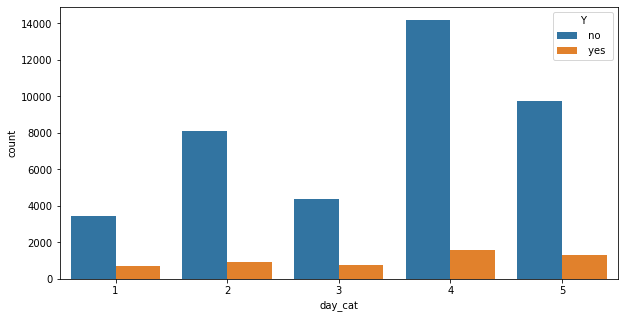

In [ ]:
df["day_cat"] = np.nan
df.loc[df['Day'] <5, 'day_cat'] = '1'
df.loc[(df['Day'] >=5)&(df['Day'] <=9), 'day_cat'] = '2'
df.loc[(df['Day'] >=10)&(df['Day'] <=13), 'day_cat'] = '3'
df.loc[(df['Day'] >=14)&(df['Day'] <=21), 'day_cat'] = '4'
df.loc[(df['Day'] >=22), 'day_cat'] = '5'
plt.figure(figsize=(10,5))
sns.countplot(x="day_cat",hue="Y",data=df, order=('1','2','3','4','5'))
plt.show()

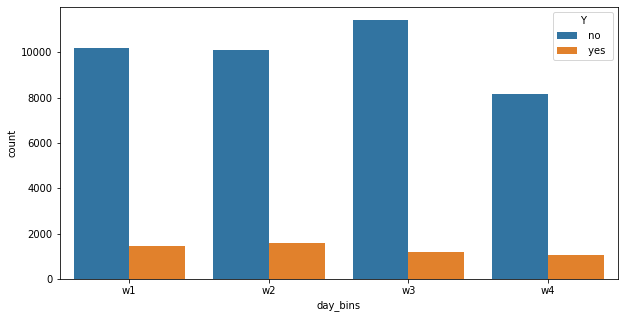

In [ ]:
df["day_bins"]=pd.cut(df.Day,bins=4,labels=["w1","w2","w3","w4"])
plt.figure(figsize=(10,5))
sns.countplot(x="day_bins",hue="Y",data=df)
plt.show()

Potential clients opted to suscribe term deposits during, the next marketing campaign and should focus its activity throghout these seasons.

## Analysing dependency on Compaign attribute

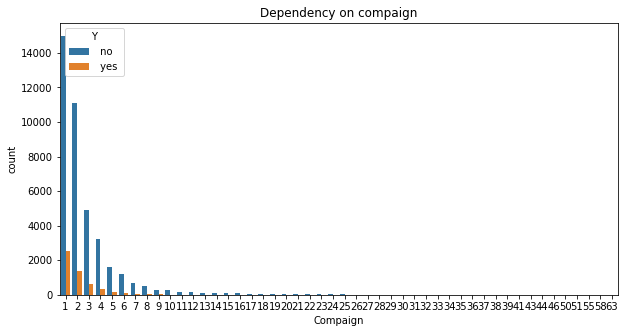

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="Compaign",hue="Y",data=df)
plt.title("Dependency on compaign")
plt.show()

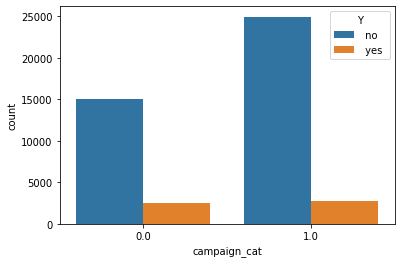

In [ ]:
df["campaign_cat"] = np.nan
df.loc[df['Compaign'] ==1, 'campaign_cat'] = 0
df.loc[(df['Compaign'] >1), 'campaign_cat'] = 1
sns.countplot(x="campaign_cat",hue="Y",data=df)
plt.show()

## Analysing dependency on Pdays attribute

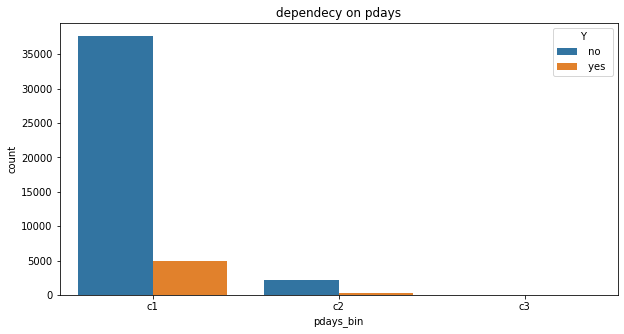

In [ ]:
plt.figure(figsize=(10,5))
df["pdays_bin"]=pd.cut(df.Pdays,bins=3,labels=["c1","c2","c3"])
sns.countplot(x="pdays_bin",hue="Y",data=df)
plt.title("dependecy on pdays")
plt.show()

## Analysing dependency on  Previous attribute

<function matplotlib.pyplot.show(*args, **kw)>

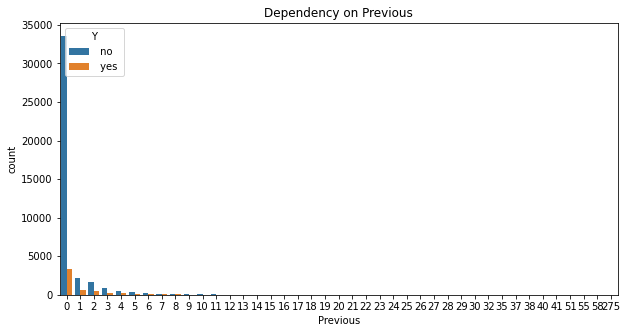

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="Previous",hue="Y",data=df)
plt.title("Dependency on Previous")
plt.show

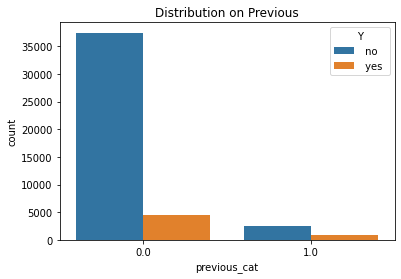

In [ ]:
df["previous_cat"] = np.nan
df.loc[df['Previous'] <=2, 'previous_cat'] = 0
df.loc[(df['Previous'] >2), 'previous_cat'] = 1
sns.countplot(x="previous_cat",hue="Y",data=df)
plt.title("Distribution on Previous")
plt.show()

## Analysing dependency on poutcome attribute

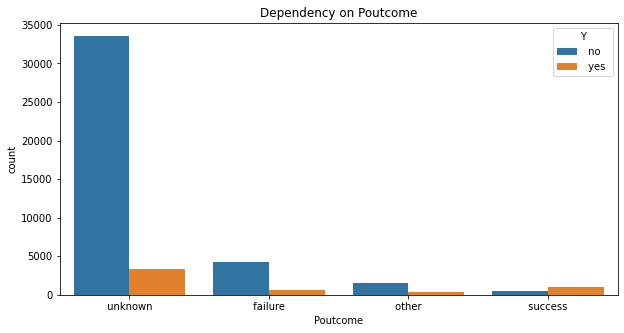

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="Poutcome",hue="Y",data=df)
plt.title("Dependency on Poutcome")
plt.show()

## Conclusion

1. Only 12.5% of the client are subscribed to a term deposit from the given data set.

2. For older than 60 age and younger than 30 age customers term deposit ratio dramatically increasing and midAge people are more likely to have term deposit.

3. The customer's account balance has a huge influence on the campaign's outcome.The customer's age affects campaign outcome as well. Future campaigns should concentrate on customers from age categories below 30 years old and above 50 years old.

4. Divorced have a considerably low amount of balance.

5. Education qualification with tertiaty are likely to have subscribed to a term deposit.

6. Client subscribed to a term deposit do not have any credit card i.e clients are financially intelligent.

7. It is an expected result that those with home loans do not have deposits because these people have chosen to secure their future as homeowners instead of deposits.

8. Looks like monthly effect on may,jun,feb,jan,aug,nov hence campaigning should more focus on these months.

9. Potential clients in the low balance and no balance category were more likely to have a house loan than people in the average and high balance category.

10. The next marketing campaign should focus on individuals of average and high balances in order to increase the likelihood of suscribing to a term deposit.